In [20]:
#mm ... small edits by M. M.
# (#aaa #aaaa #aaaa ... "attention", "importance" marks, just for M. M.)
#mm-todo-tweak #aaaa

#mm
from mmilanutil import *
## ⚠ I forgot to restart the jupyter kernel after changing the module

from matplotlib import pyplot as plt
import torch
torch.set_printoptions(profile='short')
##%precision 2
# https://pytorch.org/docs/stable/generated/torch.set_printoptions.html
torch.set_printoptions(precision=0)
torch.set_printoptions(precision=2)
torch.set_printoptions(threshold=107)
torch.set_printoptions(edgeitems=30)


In [2]:
from torch.utils.tensorboard import SummaryWriter
#writer = SummaryWriter("d:/ai/gpt2-embedding-wte-50k")
#writer = SummaryWriter("d:/ai/gpt2-embedding-wte-20k")
#writer = SummaryWriter("d:/ai/gpt2-embedding-wte-10k")
writer = SummaryWriter("d:/ai/gpt2-embedding-wte-1k")

writer.flush()

In [74]:
# https://huggingface.co/fxmarty/tiny-testing-gpt2-remote-code

from transformers import AutoTokenizer, AutoModelWithLMHead   #,  TFAutoModel

tokenizer = AutoTokenizer.from_pretrained("fxmarty/tiny-testing-gpt2-remote-code")

####model = TFAutoModel.from_pretrained("fxmarty/tiny-testing-gpt2-remote-code" ) #  ,  from_pt=True)  
model = AutoModelWithLMHead.from_pretrained("fxmarty/tiny-testing-gpt2-remote-code" ) #  ,  from_pt=True)  

D:\conda\envs\pip310\lib\site-packages\transformers\models\auto\modeling_auto.py:1352: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


In [72]:
# https://huggingface.co/sshleifer/tiny-gpt2
from transformers import AutoTokenizer, AutoModelForCausalLM  #, TFAutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("sshleifer/tiny-gpt2")

model =  AutoModelForCausalLM.from_pretrained("sshleifer/tiny-gpt2"  ) # ,  from_pt=True)

In [8]:
# https://huggingface.co/gpt2
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("gpt2")

model = AutoModelForCausalLM.from_pretrained("gpt2")

In [9]:
tokenizer

GPT2TokenizerFast(name_or_path='gpt2', vocab_size=50257, model_max_length=1024, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>'}, clean_up_tokenization_spaces=True)

In [76]:
type(model)

transformers.models.gpt2.modeling_gpt2.GPT2LMHeadModel

In [77]:
model

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(1000, 32)
    (wpe): Embedding(512, 32)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0): GPT2Block(
        (ln_1): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
      (1): GPT2Block(
        (ln_1): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=

In [53]:
model.lm_head #aaa

Linear(in_features=768, out_features=50257, bias=False)

In [57]:
dir(model.transformer.wte)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__constants__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_buffers',
 '_call_impl',
 '_fill_padding_idx_with_zero',
 '_forward_hooks',
 '_forward_pre_hooks',
 '_get_backward_hooks',
 '_get_name',
 '_is_full_backward_hook',
 '_is_hf_initialized',
 '_load_from_state_dict',
 '_load_state_dict_post_hooks',
 '_load_state_dict_pre_hooks',
 '_maybe_warn_non_full_backward_hook',
 '_modules',
 '_named_members',
 '_non_persistent_buffers_set',
 '_parameters',
 '_register_load_state_dict_pre_hook',
 '_register_state_dict_hook',
 '_replicate_for_data_parallel

In [10]:

#model = GPT2LMHeadModel.from_pretrained('gpt2')  # or any other checkpoint
word_embeddings = model.transformer.wte.weight  # Word Token Embeddings 
position_embeddings = model.transformer.wpe.weight  # Word Position

In [20]:
t = torch.randn([100, 100])
torch.save(word_embeddings, 'd:/ai/word_embeddings.pt')
#torch.load('tensor.pt')

In [12]:
!dir d: | findstr -i free
#              27 Dir(s)   2,164,035,584 bytes free


              27 Dir(s)     863,698,944 bytes free


In [17]:
# https://docs.fast.ai/callback.tensorboard.html#gpt2

layer = model.transformer.wte
vocab_dict = tokenizer.get_vocab()

#aaaa
vocab = [k for k, v in sorted(vocab_dict.items(), key=lambda x: x[1])]

#projector_word_embeddings(layer=layer, vocab=vocab, limit=2000, log_dir=            
#                          Path.home()/'tmp'/'runs'/'transformers')
#writer = SummaryWriter("d:/ai/gpt2-embedding-wte-236")
limit= 1000 # 20000 # 10000 # -1  #300 # 100 # -1
start=0
if True:
    emb = layer.weight
    print(emb.shape)
    end = start + limit if limit >= 0 else -1
    
    writer.add_embedding(emb[start:end], metadata=vocab[start:end] ) #, label_img=img[start:end])


torch.Size([50257, 768])


In [82]:
vocab[:15]

['<|endoftext|>',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.']

In [83]:
type(model.transformer.wte)

torch.nn.modules.sparse.Embedding

In [84]:
type(model.transformer.wpe)

torch.nn.modules.sparse.Embedding

In [85]:
type(model.lm_head)

torch.nn.modules.linear.Linear

In [21]:

print(mmptmaxabs(model.transformer.wte.weight))
mmptmaxabs(model.lm_head.weight)


1.785156488418579


1.785156488418579

In [23]:
import torch
##NameError: name 'torch' is not defined


# pytorch Compute the maximum absolute value of x
def mmptminabs(x):
    return torch.min(torch.abs(x.detach().flatten()  )) .item()
    #np.abs(x.detach().numpy().flatten()).max()

print(mmptminabs(model.transformer.wte.weight))

4.790785990138602e-09


In [4]:
#t = torch.randn([100, 100])
#torch.save(word_embeddings, 'd:/ai/word_embeddings.pt')
word_embeddings=torch.load('d:/ai/word_embeddings.pt')

In [28]:
#x=model.transformer.wte.weight
w=word_embeddings.detach()
x=w.flatten()
y=x.sort().values

In [29]:
torch.dot(y,y) / 50e3

tensor(15.94)

In [34]:
##d=torch.linalg.diagonal( w.T @w) #.shape

In [21]:
y[:1000]

tensor([-1.27, -1.25, -1.22, -1.21, -1.20, -1.20, -1.19, -1.18, -1.17, -1.16,
        -1.16, -1.16, -1.14, -1.14, -1.14, -1.14, -1.14, -1.14, -1.13, -1.13,
        -1.12, -1.12, -1.12, -1.12, -1.12, -1.12, -1.11, -1.11, -1.11, -1.11,
         ..., -0.88, -0.88, -0.88, -0.88, -0.88, -0.88, -0.88, -0.88, -0.88,
        -0.88, -0.88, -0.88, -0.88, -0.88, -0.88, -0.88, -0.88, -0.88, -0.88,
        -0.88, -0.88, -0.88, -0.88, -0.88, -0.88, -0.88, -0.88, -0.88, -0.88,
        -0.88])

In [22]:
y[-1000:]

tensor([0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79,
        0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79,
        0.79, 0.79, 0.79, 0.79, 0.79, 0.79,  ..., 1.28, 1.29, 1.29, 1.29, 1.29,
        1.29, 1.30, 1.33, 1.33, 1.34, 1.34, 1.35, 1.35, 1.35, 1.37, 1.39, 1.40,
        1.40, 1.42, 1.43, 1.47, 1.48, 1.51, 1.54, 1.54, 1.60, 1.65, 1.66, 1.71,
        1.79])

In [15]:
z=y[::100]
z.shape

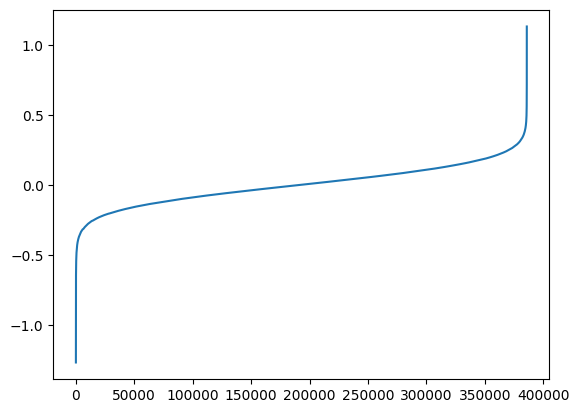

In [25]:
plt.plot(z)

(array([5.5713e+04, 5.3950e+04, 5.0461e+04, 4.5385e+04, 3.9352e+04,
        3.3579e+04, 2.7546e+04, 2.1700e+04, 1.6956e+04, 1.2104e+04,
        9.1430e+03, 6.2170e+03, 4.7790e+03, 3.0020e+03, 2.0250e+03,
        1.3760e+03, 8.8700e+02, 5.7700e+02, 3.7100e+02, 2.4600e+02,
        1.5800e+02, 1.1300e+02, 7.8000e+01, 5.7000e+01, 4.1000e+01,
        3.1000e+01, 2.6000e+01, 2.0000e+01, 1.7000e+01, 1.5000e+01,
        1.1000e+01, 8.0000e+00, 7.0000e+00, 5.0000e+00, 4.0000e+00,
        4.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([3.92350792e-08, 2.53963713e-02, 5.07927015e-02, 7.61890337e-02,
        1.01585366e-01, 1.26981705e-01, 1.52378038e-01, 1.77774370e-01,
        2.03170702e-01, 2.28567034e-01, 2.53963351e-01, 2.79359698e-01,
        3.04756016e-01, 3.30152363e-01, 3.55548680e-01, 3.80945027e-01,
        4.06341344e-01, 4.3173

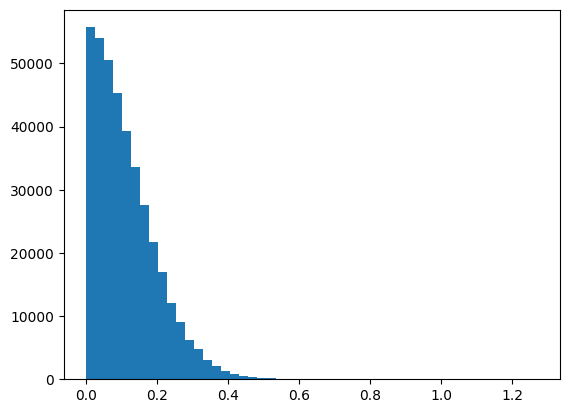

In [35]:
plt.hist( ( torch.abs(z)  )  ,  50  )

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 2.0000e+00, 2.0000e+00, 3.0000e+00, 4.0000e+00,
        7.0000e+00, 9.0000e+00, 1.2000e+01, 1.7000e+01, 2.5000e+01,
        3.7000e+01, 5.0000e+01, 7.2000e+01, 1.0100e+02, 1.4600e+02,
        2.0500e+02, 2.8800e+02, 4.0800e+02, 5.7600e+02, 8.0500e+02,
        1.1430e+03, 1.6280e+03, 2.2870e+03, 3.2310e+03, 4.5570e+03,
        6.4420e+03, 9.1070e+03, 1.2804e+04, 1.8000e+04, 2.5019e+04,
        3.4341e+04, 4.5623e+04, 5.6670e+04, 6.2927e+04, 5.6267e+04,
        3.2148e+04, 9.6490e+03, 1.2010e+03, 1.4400e+02, 1.3000e+01]),
 array([-7.40632534, -7.25612402, -7.1059227 , -6.95572138, -6.80552006,
        -6.65531874, -6.50511742, -6.3549161 , -6.20471478, -6.05451345,
        -5.90431213, -5.75411081, -5.60390949, -5.45370817, -5.30350685,
        -5.15330553, -5.00310421, -4.85290289, -4.70270157, -4.55250025,
        -4.40229893, -4.25

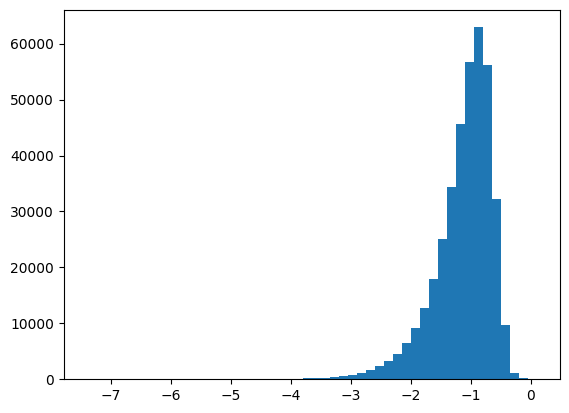

In [24]:
plt.hist( torch.log10( torch.abs(z)  )  ,  50  )

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 3.0000e+00, 4.0000e+00, 7.0000e+00, 1.0000e+01,
        1.7000e+01, 2.1000e+01, 3.3000e+01, 5.5000e+01, 9.7000e+01,
        1.8400e+02, 3.6400e+02, 7.7800e+02, 1.6320e+03, 3.7140e+03,
        6.1920e+03, 1.2221e+04, 2.0972e+04, 3.1242e+04, 4.1731e+04,
        5.0158e+04, 5.2706e+04, 4.9331e+04, 4.0787e+04, 3.0167e+04,
        2.0113e+04, 1.1674e+04, 6.2430e+03, 3.0690e+03, 1.4070e+03,
        5.9400e+02, 2.3800e+02, 9.6000e+01, 4.3000e+01, 2.4000e+01,
        1.7000e+01, 1.1000e+01, 7.0000e+00, 3.0000e+00, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-1.26981664, -1.22177112, -1.17372561, -1.12568009, -1.07763457,
        -1.02958906, -0.98154354, -0.93349802, -0.88545251, -0.83740699,
        -0.78936148, -0.74131596, -0.69327044, -0.64522499, -0.59717947,
        -0.54913396, -0.50108844, -0.45304289, -0.40499738, -0.35695189,
        -0.30890638, -0.26

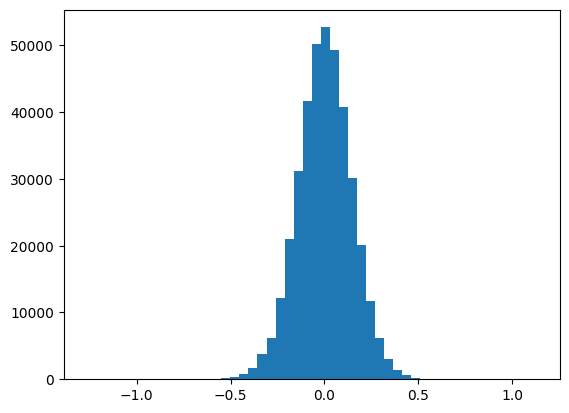

In [18]:
plt.hist(z,50)

In [87]:
tokenizer.backend_tokenizer.pre_tokenizer.pre_tokenize_str(" pre space Hello,\t \r\n\r\n  how are  you?\n")
# pre space

[('Ġpre', (0, 4)),
 ('Ġspace', (4, 10)),
 ('ĠHello', (10, 16)),
 (',', (16, 17)),
 ('ĉĠčĊčĊĠ', (17, 24)),
 ('Ġhow', (24, 28)),
 ('Ġare', (28, 32)),
 ('Ġ', (32, 33)),
 ('Ġyou', (33, 37)),
 ('?', (37, 38)),
 ('Ċ', (38, 39))]

In [88]:
text=" pre space Let's test this tokenizer."
tokenizer.encode(text)


[577, 405, 571, 317, 269, 7, 83, 194, 328, 526, 227, 75, 213, 529, 199, 14]

In [89]:
encoded_input_gpt2 = tokenizer(text , return_tensors='pt')
encoded_input_gpt2 

{'input_ids': tensor([[577,  ...,  14]]), 'attention_mask': tensor([[1,  ..., 1]])}

In [90]:
# https://discuss.pytorch.org/t/gpt2-and-bert-embeddings-hugging-face/168989
output_gpt2 = model(**encoded_input_gpt2)
type(output_gpt2)

transformers.modeling_outputs.CausalLMOutputWithCrossAttentions

In [97]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 2480-D21D

 Directory of C:\Users\marti\OneDrive\AI

04/29/2023  21:08             3,660 #openai.e.f8.sh#
06/04/2023  01:57    <DIR>          .
06/02/2023  21:37    <DIR>          ..
05/21/2023  11:09    <DIR>          .conda
05/06/2023  20:28                73 .condarc
03/10/2021  16:51             1,799 .gitignore
06/03/2023  19:49    <DIR>          .ipynb_checkpoints
05/31/2023  17:21                 0 __init__.py
04/29/2023  21:11            43,023 1models.json
05/17/2023  04:49               797 abcdef.f8.tokenizer.json
05/22/2023  11:39             5,238 ai-212.e.f8.py
05/10/2022  20:22             1,395 asktutor-3.prompt
02/28/2021  22:34            13,868 AutoTokenizer-1.ipynb
02/27/2021  16:45    <DIR>          bart
05/10/2022  20:22               688 bash-one-liner-generator-from-natural-language-1.prompt
01/30/2021  16:32           247,682 Beginner's Guide to Retrain GPT-2 (117M) to Generate Custom Text Content _ by Ng W

In [95]:
ll

NameError: name 'll' is not defined

In [96]:
mmll

NameError: name 'mmll' is not defined

In [99]:
# https://stackoverflow.com/questions/6886493/get-all-object-attributes-in-python

def mmll(a):
    for x in dir(a):
        print(x, type(getattr(a,x)))

In [101]:
mmll(model)

T_destination <class 'typing.TypeVar'>
__annotations__ <class 'dict'>
__call__ <class 'method'>
__class__ <class 'type'>
__delattr__ <class 'method'>
__dict__ <class 'dict'>
__dir__ <class 'method'>
__doc__ <class 'str'>
__eq__ <class 'method-wrapper'>
__format__ <class 'builtin_function_or_method'>
__ge__ <class 'method-wrapper'>
__getattr__ <class 'method'>
__getattribute__ <class 'method-wrapper'>
__gt__ <class 'method-wrapper'>
__hash__ <class 'method-wrapper'>
__init__ <class 'method'>
__init_subclass__ <class 'builtin_function_or_method'>
__le__ <class 'method-wrapper'>
__lt__ <class 'method-wrapper'>
__module__ <class 'str'>
__ne__ <class 'method-wrapper'>
__new__ <class 'builtin_function_or_method'>
__reduce__ <class 'builtin_function_or_method'>
__reduce_ex__ <class 'builtin_function_or_method'>
__repr__ <class 'method'>
__setattr__ <class 'method'>
__setstate__ <class 'method'>
__sizeof__ <class 'builtin_function_or_method'>
__str__ <class 'method-wrapper'>
__subclasshook__ <

In [100]:
mmll(output_gpt2)

__annotations__ <class 'dict'>
__class__ <class 'type'>
__class_getitem__ <class 'builtin_function_or_method'>
__contains__ <class 'builtin_function_or_method'>
__dataclass_fields__ <class 'dict'>
__dataclass_params__ <class 'dataclasses._DataclassParams'>
__delattr__ <class 'method-wrapper'>
__delitem__ <class 'method'>
__dict__ <class 'dict'>
__dir__ <class 'builtin_function_or_method'>
__doc__ <class 'str'>
__eq__ <class 'method'>
__format__ <class 'builtin_function_or_method'>
__ge__ <class 'method-wrapper'>
__getattribute__ <class 'method-wrapper'>
__getitem__ <class 'method'>
__gt__ <class 'method-wrapper'>
__hash__ <class 'NoneType'>
__init__ <class 'method'>
__init_subclass__ <class 'builtin_function_or_method'>
__ior__ <class 'method-wrapper'>
__iter__ <class 'method-wrapper'>
__le__ <class 'method-wrapper'>
__len__ <class 'method-wrapper'>
__lt__ <class 'method-wrapper'>
__match_args__ <class 'tuple'>
__module__ <class 'str'>
__ne__ <class 'method-wrapper'>
__new__ <class 'bu

In [9]:
dir(tokenizer)
type(tokenizer)



transformers.models.gpt2.tokenization_gpt2_fast.GPT2TokenizerFast

In [ ]:
# what mistake is in the re.sub

#gpt3
